# Laboratorio di Simulazione Numerica: lezione 5

Elia Steve, 47122A

In [51]:
import numpy as np
import matplotlib.pyplot as plt

### Esercizio 5.1

In questo esercizio dobbiamo usare l'algoritmo di Metropolis per estrarre punti dalla densità di probabilità associata a due orbtali dell'atomo di idrogeno ($n=1$, $l=m=0$, cioè lo stato fondamentale, e $n=2$, $l=1$, $m=0$) e usare questi punti per calcolare il valor medio del raggio, in tre casi:

1. usando una probabilità di transizione uniforme per proporre mosse dell'algoritmo di Metropolis;
2. sempre usando una probabilità uniforme, ma scegliendo come valore iniziale un punto lontano dalla regione dove è concentrata la maggior parte della densità di probabilità; e
3. usando una distribuzione normale multivariata come probabilità di transizione.

In tutti i casi ho scelto la larghezza della distribuzione di probabilità di transizione empiricamente, in modo da fissare la probabilità di accettazione nell'algoritmo di Metropolis a un valore vicino al $50\%$; ho anche scartato i primi $1000$ valori generati, in modo da equilibrare il campionamento, tranne che nel secondo caso (dove questo avrebbe impedito di osservare gli effetti della scelta del punto iniziale). Per stimare le incertezze sul raggio ho usato come al solito il metodo del data blocking, dividendo i valori estratti in $100$ blocchi da $1000$ valori ciascuno.

Definisco funzioni per disegnare i grafici di punti campionati (che mi dà una rappresentazione della distribuzione di probabilità), raggio:

In [52]:
def draw_scatter(X, Y, Z, title=None, s=plt.rcParams['lines.markersize'] ** 2):
    """
    Funzione per disegnate uno scatterplot dei punti campionati.

    Argomenti:
        X, Y, Z: Vettori con coordinate x, y, z, dei punti campionati rispettivamente
        title: Titolo del grafico
        s: Dimensioni del marker usato per indicare i punti nel grafico

    Restituisce:
        fig, ax: figura e asse del grafico disegnato
    """
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    sc = ax.scatter(X, Y, Z, c=np.arange(len(Z)), marker='.', s=s)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(10, 30)
    fig.colorbar(sc, shrink=0.7, label="Ordine di estrazione")
    ax.set_title(title)
    ax.set_box_aspect(None, zoom=0.90)
    #fig.legend()
    
    plt.show()
    return fig, ax

In [53]:
def draw_plot_of_radius(r, err, title=None, exact_value=1.5):
    """
    Funzione per disegnare un grafico delle medie progressive del raggio.

    Argomenti:
        r: Vettore delle medie progressive del raggio
        err: Vettore degli errori sulle medie progressive
        title: Titolo del grafico
        exact_value: Valore esatto del raggio, da disegnare sul grafico
    """
    xs = np.arange(len(r))
    plt.errorbar(xs, r, yerr=err, label="Monte Carlo")
    plt.axhline(exact_value, color="tab:orange", label="Valore esatto")
    plt.title(title)
    plt.xlabel("Blocco")
    plt.ylabel(r"$\langle r\rangle$")
    plt.legend()
    plt.grid()

#### Campionamento con probabilità di transizione uniforme

Disegno i grafici dei punti campionati:

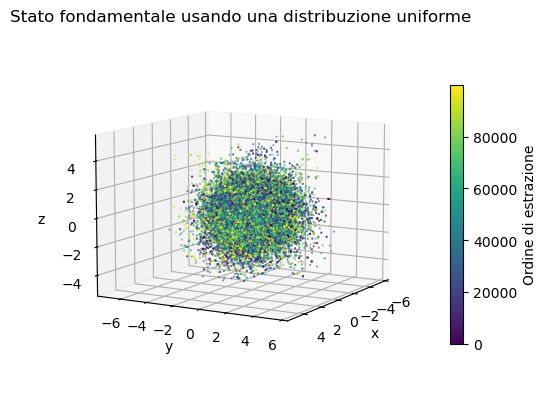

In [54]:
X, Y, Z = np.loadtxt("out_GS.dat", usecols=(0, 1, 2), unpack=True)
__ = draw_scatter(X, Y, Z, title="Stato fondamentale usando una distribuzione uniforme", s=1)

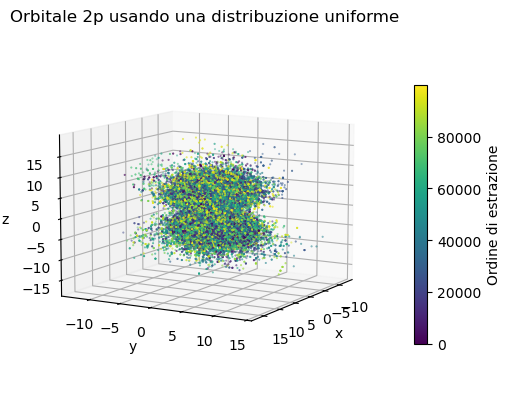

In [55]:
X, Y, Z = np.loadtxt("out_2p.dat", usecols=(0, 1, 2), unpack=True)
__ = draw_scatter(X, Y, Z, title="Orbitale 2p usando una distribuzione uniforme", s=1)

I grafici sono come ci aspettiamo: una distribuzione a simmetria sferica nel caso dello stato fondamentale e una a simmetria cilindrica e con i "lobi" nel caso dell'orbitale 2p. Disegno i grafici delle medie progressive dei raggi:

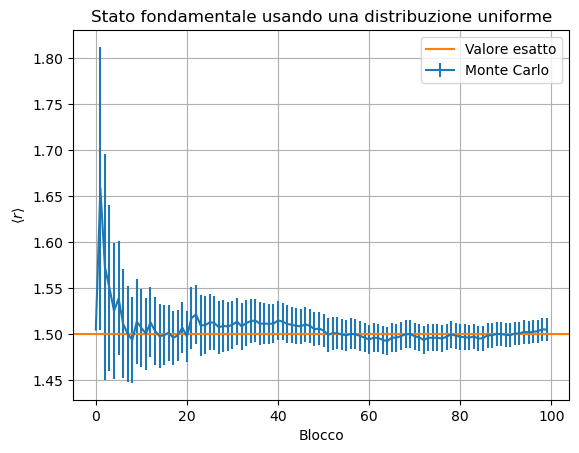

In [56]:
r_GS, err_GS = np.loadtxt("out_r_GS.dat", usecols=(0, 1), unpack=True)
draw_plot_of_radius(r_GS, err_GS, title="Stato fondamentale usando una distribuzione uniforme")

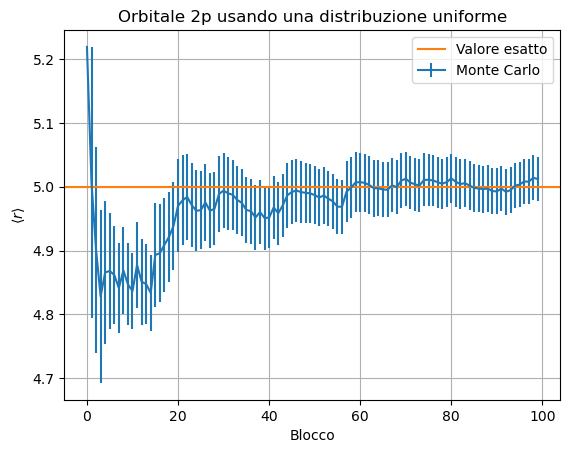

In [57]:
r_2p, err_2p = np.loadtxt("out_r_2p.dat", usecols=(0, 1), unpack=True)
draw_plot_of_radius(r_2p, err_2p, title="Orbitale 2p usando una distribuzione uniforme", exact_value=5)

Vediamo che in entrambi i casi c'è buona compatibilità con il valore esatto.

#### Campionamento con probabilità di transizione uniforme, "partendo da lontano"

In questo caso ho usao come punto iniziale per il campionamento $(100, 0, 0)$, senza equilibrare l'algoritmo. Disegno i grafici:

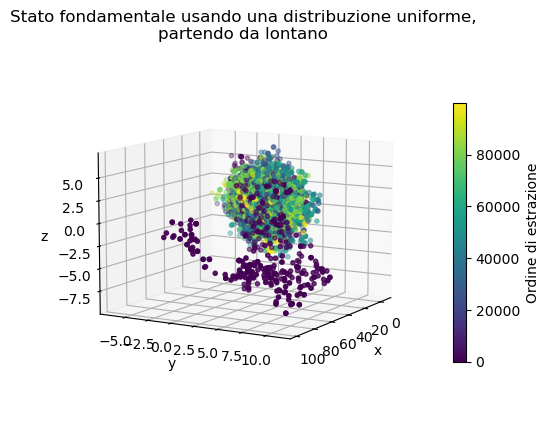

In [58]:
X, Y, Z = np.loadtxt("out_GS_faraway.dat", usecols=(0, 1, 2), unpack=True)
__ = draw_scatter(X, Y, Z, title="Stato fondamentale usando una distribuzione uniforme,\npartendo da lontano")

Vediamo che nel generare i primi punti l'algoritmo segue un percorso che progressivamente si avvicina alla regione vicina all'origine, dove è concentrata la maggior parte della probabilità. Una volta raggiunta questa regione, il campionamento procede come nel caso precedente. Disegno il grafico delle medie progressive dei raggi:

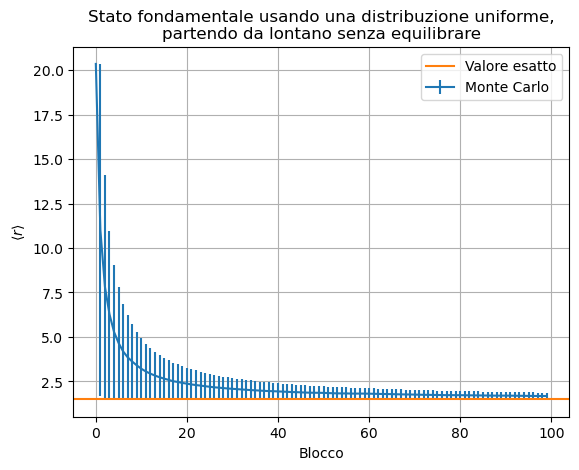

In [59]:
r_faraway, err_faraway = np.loadtxt("out_r_GS_faraway.dat", usecols=(0, 1), unpack=True)
draw_plot_of_radius(r_faraway, err_faraway, title="Stato fondamentale usando una distribuzione uniforme,\npartendo da lontano senza equilibrare")

Qui vediamo che i punti iniziali alzano molto i primi valori del raggio, e il loro effetto permane anche nei valori e nelle incertezze dei blocchi successivi (le incertezze all'inizio risentono della variabilità del raggio causata dal fatto che i punti campionati "viaggiano" verso l'origine). Controlliamo se scartando i primi $1000$ punti i risultati del raggio diventano analoghi al caso precedente: siccome il codice in C++ non è stato pensato per fare questa operazione a posteriori rispetto al campionamento la faccio io a mano con NumPy usando i valori dei punti campionati.

In [60]:
positions = np.column_stack((X, Y, Z))
positions = positions[1000:] #Scarto i primi 1000 valori
radii = np.linalg.norm(positions, axis=1)
radii = np.reshape(radii, (99, 1000)) #Divido i dati in 99 blocchi da 1000 elementi
block_means = np.mean(radii, axis=1)
rs, errs = [], []
for i in range(99):
    rs.append(np.mean(block_means[:i+1]))
    #Il primo errore sarà nan, indica una deviazione standard del campione non definita
    errs.append(np.std(block_means[:i+1])/np.sqrt(i))

/var/folders/zy/g811k_6d3wx_x1310494_6wr0000gn/T/ipykernel_82940/1972465645.py:10: RuntimeWarning: invalid value encountered in scalar divide
  errs.append(np.std(block_means[:i+1])/np.sqrt(i))


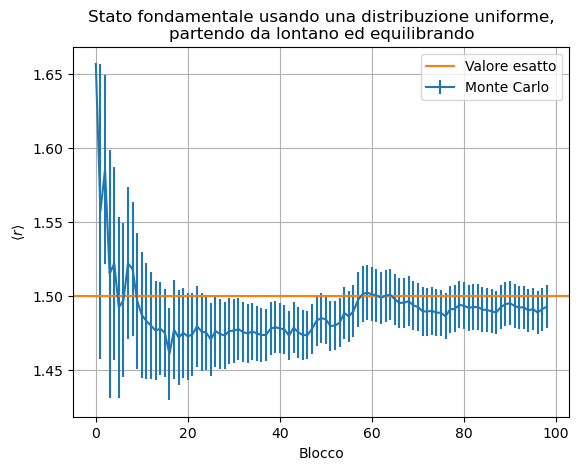

In [61]:
draw_plot_of_radius(rs, errs, title="Stato fondamentale usando una distribuzione uniforme,\npartendo da lontano ed equilibrando")

Vediamo che scartando i primi $1000$ valori il grafico (ora con $99$ blocchi invece di $100$) è analogo a quello del caso precedente.

#### Campionamento con probabilità di transizione gaussiana

Disegno i grafici dei punti campionati:

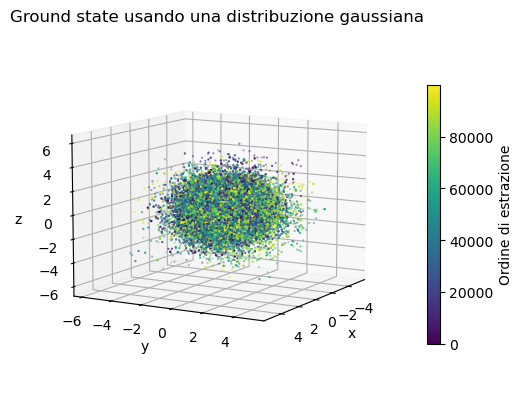

In [62]:
X, Y, Z = np.loadtxt("out_GS_gauss.dat", usecols=(0, 1, 2), unpack=True)
__ = draw_scatter(X, Y, Z, title="Ground state usando una distribuzione gaussiana", s=1)

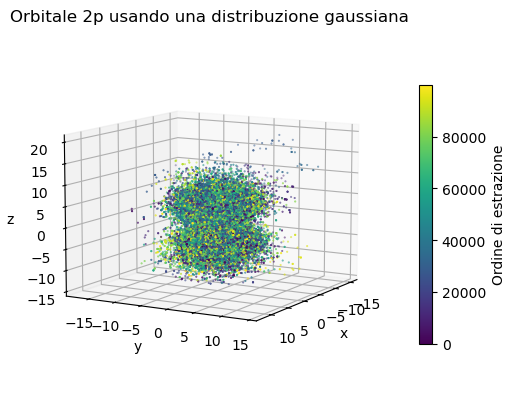

In [63]:
X, Y, Z = np.loadtxt("out_2p_gauss.dat", usecols=(0, 1, 2), unpack=True)
__ = draw_scatter(X, Y, Z, title="Orbitale 2p usando una distribuzione gaussiana", s=1)

I grafici sono quelli che ci aspettiamo, come nel caso di probabilità uniforme. Ora disegno i grafici delle medie progressive dei raggi:

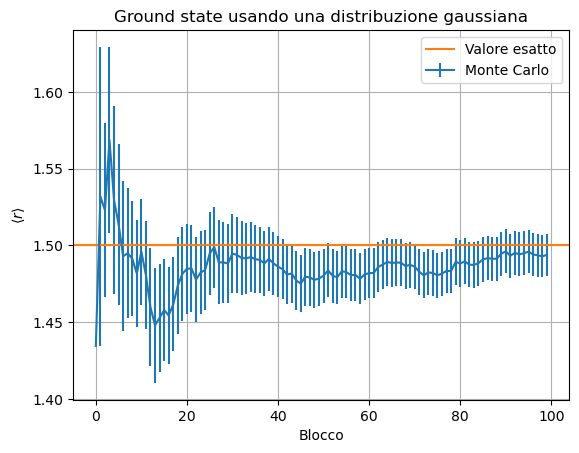

In [64]:
r_GS_g, err_GS_g = np.loadtxt("out_r_GS_gauss.dat", usecols=(0, 1), unpack=True)
draw_plot_of_radius(r_GS_g, err_GS_g, title="Ground state usando una distribuzione gaussiana")

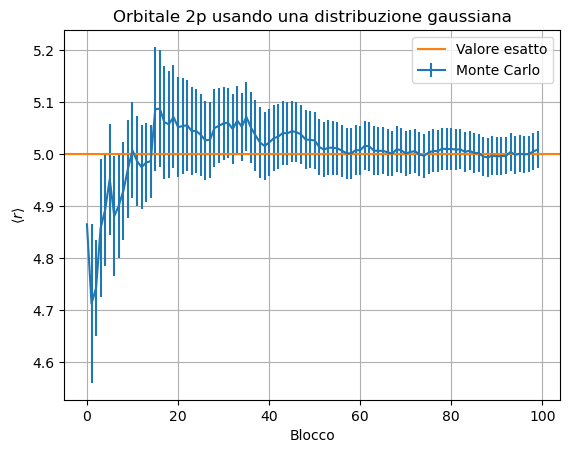

In [65]:
r_2p_g, err_2p_g = np.loadtxt("out_r_2p_gauss.dat", usecols=(0, 1), unpack=True)
draw_plot_of_radius(r_2p_g, err_2p_g, title="Orbitale 2p usando una distribuzione gaussiana", exact_value=5)

Anche qui vediamo buona compatibilità con i valori esatti. I grafici sono anche equivalenti a quelli ottenuti usando una probabilità di transizione uniforme, e gli errori al centesimo blocco sono simili. Concludiamo che i risultati ottenuti usando una probabilità di transizione uniforme e una gaussiana sono equivalenti.